
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

## The Data

**Download the fashion mnist dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
fashion = fashion_mnist.load_data()
len(fashion)

2

In [4]:
fashion

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train.shape

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
x_train[42].shape

(28, 28)

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

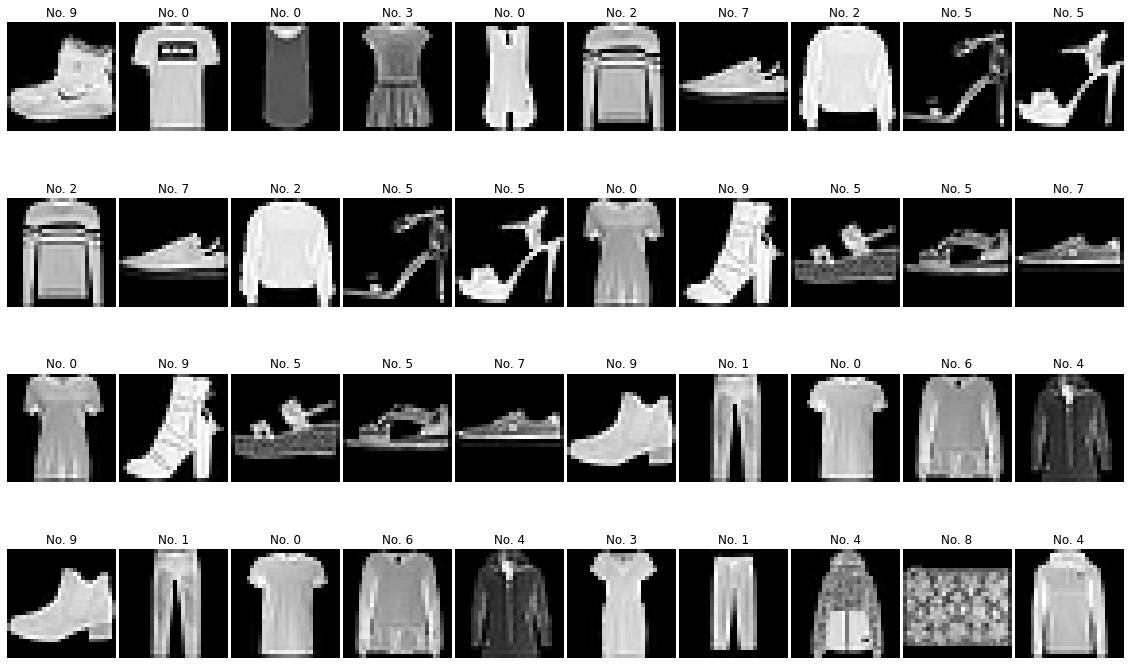

In [12]:
num_rows, num_cols = 4, 10
f, ax = plt.subplots(4, 10, figsize=(20, 12),
                     gridspec_kw={'wspace':0.03, 'hspace':0.4}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(x_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

In [13]:
y_train[42]

9

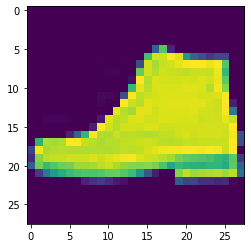

In [21]:
plt.imshow(x_train[42]);

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [15]:
x_train[42].max()

255

In [16]:
x_test[42].max()

255

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
x_train[42].min()

0.0

In [19]:
x_train[42].max() # the max value after being normalized

1.0

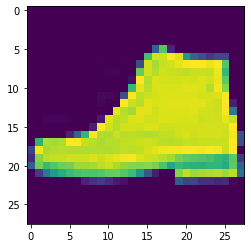

In [20]:
plt.imshow(x_train[42]);  # the image after being normalized

**Reshape the X into 4 dimension**

In [22]:
x_train.shape[0]

60000

In [23]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [24]:
X_train.shape, X_test.shape  # x train/test set after being reshaped into 4 dimension

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [25]:
set(y_train)  # these are the classes of images where they belong to.

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [26]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [27]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
y_train.shape

(60000,)

In [29]:
Y_train = y_train.reshape(-1, 1)

In [30]:
Y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [225]:
# Y_train = to_categorical(y_train, 10) 
# Y_test = to_categorical(y_test, 10)
# Y_test.shape

In [31]:
OHE = OneHotEncoder(sparse=False)
Y_train = OHE.fit_transform(Y_train)
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
Y_train.shape

(60000, 10)

In [33]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [34]:
y_test.shape

(10000,)

In [35]:
Y_test = y_test.reshape(-1, 1)
Y_test

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

In [36]:
OHE = OneHotEncoder(sparse = False)
Y_test = OHE.fit_transform(Y_test)
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
Y_test.shape

(10000, 10)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# modelimin ihtiyacı olacak layerlerı import ettim. (Dense, Conv2D, MaxPool2D, Flatten)

In [42]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu',))  
  
model.add(MaxPool2D(pool_size=(2, 2), strides = (1,1))) 
model.add(Flatten()) 

model.add(Dense(128, activation='relu'))  
model.add(Dense(10, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']
             )


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 17500)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2240128   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
_________________________________________________________________


###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [44]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.3683 - accuracy: 0.8680
Epoch 2/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.2525 - accuracy: 0.9100s - loss: 0.2525 - accuracy
Epoch 3/10
1875/1875 [==============================] - 147s 79ms/step - loss: 0.2151 - accuracy: 0.9230
Epoch 4/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.1911 - accuracy: 0.9325
Epoch 5/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.1737 - accuracy: 0.9393
Epoch 6/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.1607 - accuracy: 0.9442 37s - loss: 0.1561 - accuracy: 0.946 - ETA: 37s - loss: 0.1562 - accuracy: 0.946 - ETA:  - ETA: 8s - - ETA: 1s - - ETA: 0s - loss: 0.1605 - accu
Epoch 7/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.1500 - accuracy: 0.9477
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1384 - accuracy: 0.

In [45]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy
0,0.368343,0.867967
1,0.252460,0.910033
2,0.215111,0.922983
3,0.191057,0.932517
4,0.173698,0.939317


**Plot values of metrics you used in your model.**

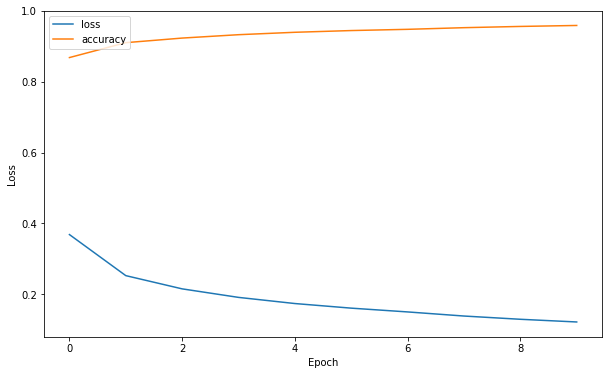

In [49]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.accuracy, label="accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper left");

In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
model.history.history

{'loss': [0.36834296584129333,
  0.25245967507362366,
  0.2151106894016266,
  0.19105692207813263,
  0.17369824647903442,
  0.16068880259990692,
  0.15002325177192688,
  0.1384296715259552,
  0.12926988303661346,
  0.12166580557823181],
 'accuracy': [0.8679666519165039,
  0.9100333452224731,
  0.9229833483695984,
  0.9325166940689087,
  0.9393166899681091,
  0.9441999793052673,
  0.9476666450500488,
  0.9523166418075562,
  0.9558333158493042,
  0.9585666656494141]}

**Train the model using earlystop.**

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [258]:
model.fit(X_train, Y_train, 
          batch_size = 32, 
          epochs = 5, 
          validation_data = (X_test,Y_test),
          callbacks = [early_stop]
         )

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0888 - accuracy: 0.9706 - val_loss: 0.4534 - val_accuracy: 0.9070
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0864 - accuracy: 0.9714 - val_loss: 0.4668 - val_accuracy: 0.9083
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0819 - accuracy: 0.9733 - val_loss: 0.4963 - val_accuracy: 0.9030


In [260]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.088846,0.97060,0.453374,0.9070
1,0.086449,0.97145,0.466773,0.9083
2,0.081938,0.97330,0.496328,0.9030


In [261]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 28)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 17500)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2240128   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
_________________________________________________________________


**Plot values of metrics you used in your model.**

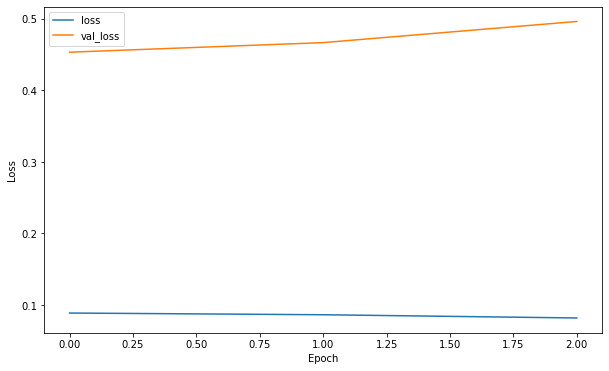

In [269]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

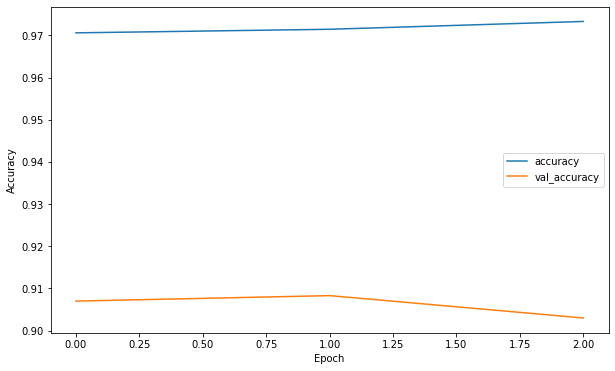

In [267]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend();

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [270]:
from sklearn.metrics import classification_report,confusion_matrix

In [271]:
preds = model.predict(X_test)

In [272]:
preds

array([[2.98002479e-20, 2.00900902e-26, 1.53157795e-18, ...,
        6.19526042e-10, 6.22970507e-14, 1.00000000e+00],
       [2.57612481e-13, 0.00000000e+00, 1.00000000e+00, ...,
        4.37183079e-22, 5.48168210e-23, 1.69352461e-33],
       [5.44292936e-14, 1.00000000e+00, 1.74948299e-19, ...,
        2.51639066e-21, 1.68352569e-13, 1.80262810e-21],
       ...,
       [1.67658883e-16, 0.00000000e+00, 1.28990654e-23, ...,
        8.67005159e-21, 1.00000000e+00, 4.59375882e-33],
       [1.71172457e-13, 1.00000000e+00, 3.63361583e-18, ...,
        2.74718051e-21, 2.12491172e-16, 6.78135107e-16],
       [1.23469064e-07, 1.55834894e-12, 1.16394062e-06, ...,
        8.21517110e-02, 2.19376772e-04, 3.69222718e-03]], dtype=float32)

In [276]:
predictions = np.argmax(preds, axis=1)
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [277]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.90      0.79      0.84      1000
           3       0.89      0.93      0.91      1000
           4       0.80      0.90      0.85      1000
           5       0.98      0.97      0.97      1000
           6       0.71      0.77      0.74      1000
           7       0.96      0.98      0.97      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [278]:
print(confusion_matrix(y_test, predictions))

[[761   0  12  32   9   2 177   0   7   0]
 [  2 975   0  11   2   0   5   0   5   0]
 [ 13   0 790  10 110   0  72   1   4   0]
 [  9   3   8 933  19   0  27   0   1   0]
 [  2   0  30  32 897   2  37   0   0   0]
 [  0   0   0   0   0 971   0  19   1   9]
 [ 62   2  35  31  84   1 774   0  11   0]
 [  0   0   0   0   0   5   0 977   0  18]
 [  3   2   3   4   1   4   1   1 979   2]
 [  0   0   0   0   0   8   0  19   0 973]]


In [279]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.49632808566093445
Test accuracy: 0.902999997138977


# Prediction

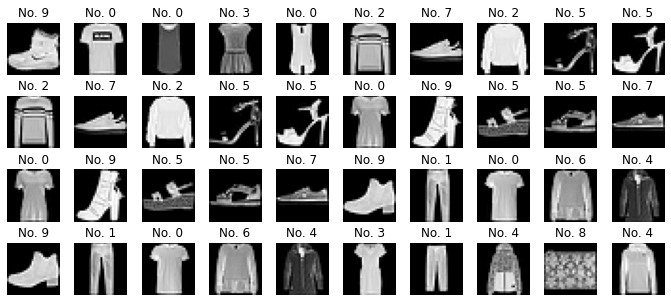

In [281]:
num_rows, num_cols = 4, 10
f, ax = plt.subplots(4, 10, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.4}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()


In [286]:
X_test[33].shape

(28, 28, 1)

In [291]:
my_number = X_test[0]

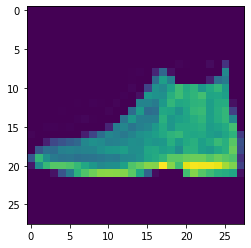

In [292]:
plt.imshow(my_number.reshape(28,28))

In [293]:
model.predict(my_number.reshape(1,28,28,1))

array([[2.9799795e-20, 2.0090090e-26, 1.5315896e-18, 1.2896241e-26,
        3.7898243e-18, 4.0306755e-08, 8.6797033e-16, 6.1952604e-10,
        6.2295865e-14, 1.0000000e+00]], dtype=float32)

In [294]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([9], dtype=int64)

# End of Assignment

In [151]:
model.save("cnn_assignment2.h5")